# Reaction Time Analysis

## Description

### Setup:
We conducted an experiment where the participants had to press one of two keys (g or h) for the shown trail which had specific factors.
#### Factors & Trails:
The factors for our experiment are the following:
- Amount of mental processing required:
    - Pre-Attentive processing: Red and blue squares
    - Attentive processing: Even and odd numbers (1-100)
- Distraction:
    - Distraction: Changing, green dots on the background
    - No distraction

Therefore we had four different trials with two different stimuli and either a given mental
complexity or no mental complexity:
- Attentive processing with distraction (AD)
- Attentive processing without distraction (AN)
- Pre-Attentive processing with distraction (PD)
- Pre-Attentive processing without distraction (PN)

#### Variables:
- Independent: the amount of mental processing required (Binary choice between Attentive and Pre-Attentive Processing) and whether there is a distraction in the background (Binary choice between a present distraction and no distraction at all)
- Dependent: reaction time needed to input the correct corresponding key
- Controlled: pressed keys (g,h), finger position
- Confounding: limited through experiment in a laboratory and counterbalancing the trails through the balanced latin square approach

### Participants:
The experiment was conducted with four participants. The participants had all experience with computers, were in the same age and had no health issues effecting the reaction time. Thereby we were able to ensure that everybody was quite on the same level, and that results should be representative for the given background.

## Data handling

In [1]:
import pandas as pd

# Reads in the csv file
data = pd.read_csv("reaction_time_results.csv", 
                   sep=",", 
                   header="infer", 
                   usecols=["ParticipantID", 
                            "Complexity", 
                            "Distraction", 
                            "ReactionTime"])
# Extracts the relevant data
data["ParticipantID"] = pd.to_numeric(data["ParticipantID"])
data["ReactionTime"] = pd.to_timedelta(data["ReactionTime"])
data["ReactionTime"] = data["ReactionTime"].dt.total_seconds()
print(data)

     ParticipantID     Complexity Distraction  ReactionTime
0                1      Attentive         Yes      1.055722
1                1      Attentive          No      1.014640
2                1  Pre-attentive         Yes      1.308776
3                1  Pre-attentive          No      0.976670
4                1      Attentive         Yes      1.516931
5                1      Attentive          No      0.851083
6                1  Pre-attentive         Yes      1.346768
7                1  Pre-attentive          No      0.831221
8                1      Attentive         Yes      1.134973
9                1      Attentive          No      1.148035
10               1  Pre-attentive         Yes      1.177832
11               1  Pre-attentive          No      0.922510
12               1      Attentive         Yes      0.905383
13               1      Attentive          No      0.713187
14               1  Pre-attentive         Yes      1.076595
15               1  Pre-attentive       

## Scatterplots

### Attentive processing with distraction (AD)

In [2]:
ad = data[(data["Complexity"] == "Attentive") 
          & (data["Distraction"] == "Yes")].reset_index(drop=True)
ad.index += 1
ad['Trial'] = ad.index
adPlot = ad.plot.scatter(x='Trial', 
                         y='ReactionTime', 
                         label='AD')
adPlot = adPlot.set_ylabel("Reaction time in sec")

### Attentive processing without distraction (AN)

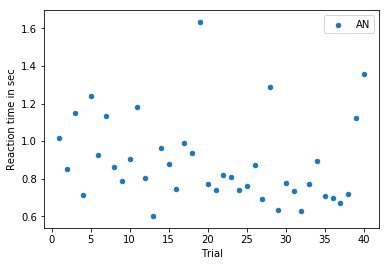

In [3]:
an = data[(data["Complexity"] == "Attentive")
          & (data["Distraction"] == "No")].reset_index(drop=True)
an.index += 1
an['Trial'] = an.index
anPlot = an.plot.scatter(x='Trial', 
                         y='ReactionTime', 
                         label='AN')
anPlot = anPlot.set_ylabel("Reaction time in sec")

### Pre-attentive with distraction (PD)

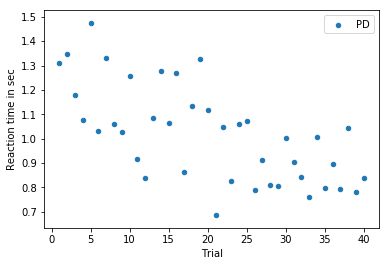

In [4]:
pd = data[(data["Complexity"] == "Pre-attentive") 
          & (data["Distraction"] == "Yes")].reset_index(drop=True)
pd.index += 1
pd['Trial'] = pd.index
pdPlot = pd.plot.scatter(x='Trial',
                         y='ReactionTime', 
                         label='PD')
pdPlot = pdPlot.set_ylabel("Reaction time in sec")

### Pre-attentive without distraction (PN)

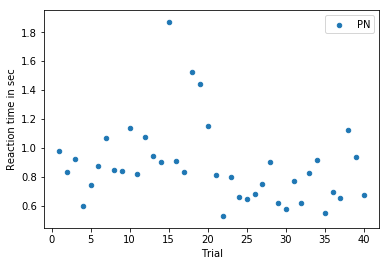

In [5]:
pn = data[(data["Complexity"] == "Pre-attentive") 
          & (data["Distraction"] == "No")].reset_index()
pn.index += 1
pn['Trial'] = pn.index
pnPlot = pn.plot.scatter(x='Trial',
                         y='ReactionTime', 
                         label='PN')
pnPlot = pnPlot.set_ylabel("Reaction time in sec")

### All conditions (AD, AN, PD, PN)

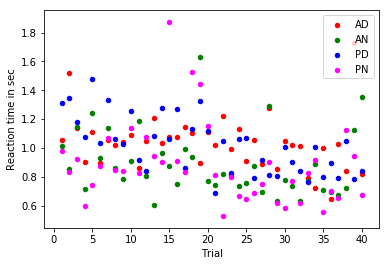

In [7]:
# Attentive and distraction
ad = data[(data["Complexity"] == "Attentive") 
          & (data["Distraction"] == "Yes")].reset_index(drop=True)
ad.index += 1
ad['Trial'] = ad.index
adPlot = ad.plot(kind='scatter', 
                 x='Trial',
                 y='ReactionTime', 
                 label='AD', 
                 color='red');

# Attentive and no distraction
an = data[(data["Complexity"] == "Attentive") 
          & (data["Distraction"] == "No")].reset_index(drop=True)
an.index += 1
an['Trial'] = an.index
anPlot = an.plot(kind='scatter', 
                 x='Trial', 
                 y='ReactionTime',
                 label='AN', 
                 color='green',
                 ax=adPlot);

#Pre-attentive and distraction
pd = data[(data["Complexity"] == "Pre-attentive") 
          & (data["Distraction"] == "Yes")].reset_index(drop=True)
pd.index += 1
pd['Trial'] = pd.index
pdPlot = pd.plot(kind='scatter',
                 x='Trial',
                         y='ReactionTime', label='PD', color='blue', ax=anPlot)

# Pre-attentive and no distraction
pn = data[(data["Complexity"] == "Pre-attentive") 
          & (data["Distraction"] == "No")].reset_index()
pn.index += 1
pn['Trial'] = pn.index
pnPlot = pn.plot(kind='scatter', x='Trial',
                         y='ReactionTime', label='PN', color='magenta', ax=pdPlot)
pnPlot = pnPlot.set_ylabel("Reaction time in sec")

## T-tests

## Boxplots

## Discussion and Results

...